http://ww2.amstat.org/publications/jse/v21n1/witt.pdf

http://nsidc.org/research/bios/fetterer.html

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/N_08_extent_v3.0.csv

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

#from scipy import stats

## Read Data

In [2]:
data = pd.read_csv('N_09_extent_v3.0.csv', dtype={'year': np.int32, 'extent': np.double})

In [3]:
data.head()

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70


In [4]:
print(data.shape)

(39, 6)


In [68]:
year = data['year']
extent = data[' extent']

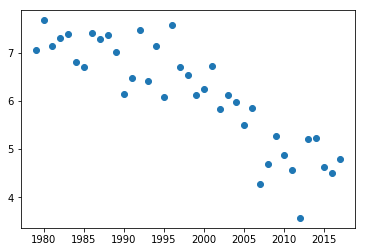

In [69]:
plt.figure(figsize=(6,4))
plt.plot(year, extent, 'o')

## Try a linear fit

In [7]:
npoints = data.shape[0]
print('number of data points = ', npoints)

number of data points =  39


In [8]:
def fitfunction(t,coeffs):
    fit = 0
    for i,c in enumerate(coeffs):
        fit += c*t**i
    return  fit

In [13]:
ndata = 20 #use the first ndata points for the fit
year1 = year[:ndata]
extent1 = extent[:ndata]

A = np.array([
    1+0*year1,
    year1
    ]).T

b = np.array(extent1)

x = la.solve(A.T@A,A.T@b)

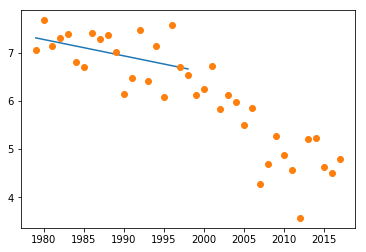

In [15]:
plt.plot(year1, fitfunction(year1,x))
plt.plot(year, extent, 'o')

### How did the linear fit "fit" as time time progresses?

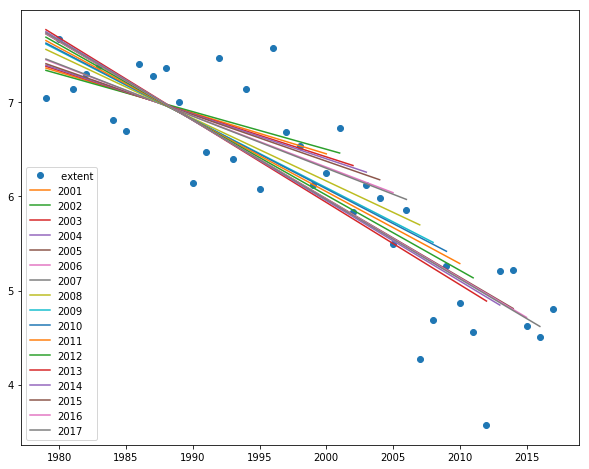

In [23]:
plt.figure(figsize=(10,8))
plt.plot(year, extent, 'o')

for ndata in range(22, npoints):
    
    year1 = year[:ndata]
    extent1 = extent[:ndata]

    A = np.array([
        1+0*year1,
        year1
        ]).T

    b = np.array(extent1)

    x = la.solve(A.T@A,A.T@b)
    
    plt.plot(year1, fitfunction(year1,x),  label='%d' % (year[0]+ndata))
    
plt.legend()

### Let's try a quadratic fit

In [52]:
ndata = 26 #use the first ndata points for the fit
year1 = year[:ndata]
extent1 = extent[:ndata]

A = np.array([
    1+0*year1,
    year1,
    year1**2
    ]).T

b = np.array(extent1)

x = la.solve(A.T@A,A.T@b)

print(x)

[6.79221628e+00 7.00452986e-07 3.50158197e-10]


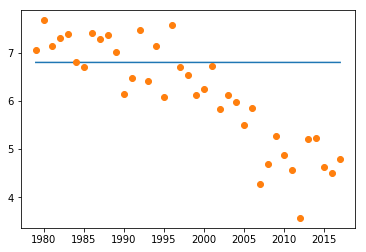

In [53]:
plt.plot(year, fitfunction(year,x))
plt.plot(year, extent, 'o')

### What went wrong?

Let's try to use the least square function from scipy

[-5.78703451e+03  5.86799957e+00 -1.48565324e-03]


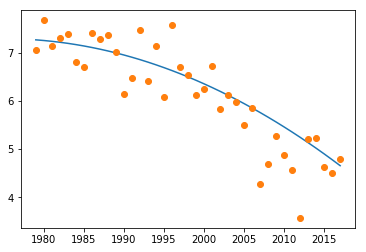

In [56]:
coeffs,residual,rank,sval=np.linalg.lstsq(A,b,rcond=None)

plt.plot(year, fitfunction(year,coeffs))
plt.plot(year, extent, 'o')

print(coeffs)


Seems to work with `lstsq`... what could be the issue with the Normal Equations method above?

Let's check the condition number of the matrix A

In [57]:
print(la.cond(A))
print(x)
print(la.norm(A@x-b))

313354558941.1675
[6.79221628e+00 7.00452986e-07 3.50158197e-10]
2.799169975001837


The matrix A becomes closer to singular as the number of columns increases (i.e., as the number of coefficients for the fit increase). We can scale the years, to mitigate this situation:

In [77]:
year2 = year - 1980
extent2 = extent

A = np.array([
    1+0*year2,
    year2,
    year2**2
    ]).T

b = np.array(extent2)

x = la.solve(A.T@A,A.T@b)


print(la.cond(A))
print(x)


1593.2774157903386
[ 7.32702301e+00 -2.55283521e-02 -1.60576890e-03]


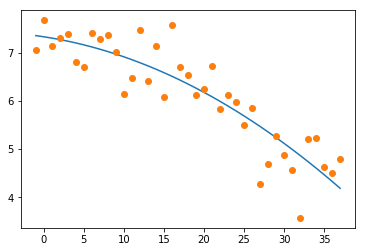

In [78]:
plt.plot(year2, fitfunction(year2,x))
plt.plot(year2, extent, 'o')